In [2]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


# Markov Chains

We want to model the process of writing a research article by a graduate student. It is assumed that in this process the student is doing one of these four activities: thinking (P), writing (E), checking email (V), or browsing the internet (N). Assume that time instants are every minute. It is known that:

- If the student is thinking, the probability that the student continues thinking in the next minute is 0.6, the probability of checking email is 0, and the probability of writing is 0.2.
- If the student is writing, the probability that the student starts thinking in the next minute is 0.4, the probability of checking email is 0.1, and the probability of browsing is 0.2.
- If the student is checking email, the probability that the student starts thinking in the next minute is 0.1. The probabilities of continuing to check email, browsing, or starting to think in the next minute are the same.
- If the student is browsing the internet, the probability that the student starts thinking in the next minute is 0, the probability of writing is 0.2, and the probability of continuing browsing is 0.7.

Assuming that this stochastic process is characterized by a Markov chain, solve the following points.


### a) We find the transition matrix for this process, assuming that the order of states is P, E, V, N.

In [3]:
M = np.array([[0.6, 0.2, 0, 0.2], [0.4, 0.3, 0.1, 0.2], [0.1, 0.7, 0.1, 0.1], [0, 0.2, 0.1, 0.7]])
print(M)

[[0.6 0.2 0.  0.2]
 [0.4 0.3 0.1 0.2]
 [0.1 0.7 0.1 0.1]
 [0.  0.2 0.1 0.7]]


### b) We determine mathematically whether the probabilities of being in P, E, V, N written in the vector $$α = [0.3, 0.1, 0.5, 0.1]$$ are steady-state probabilities.

If the probabilities in vector $\alpha$ are steady-state probabilites, then

$$\alpha = \alpha M$$

In [4]:
alpha = np.array([0.3, 0.1, 0.5, 0.1])

print(f'a = {alpha}')
print(f'aM = {alpha@M}')

a = [0.3 0.1 0.5 0.1]
aM = [0.27 0.46 0.07 0.2 ]


Since $\alpha \neq \alpha M$, the probabilities in $\alpha$ are not steady-state probabilities.

### c) The probabilities that the student is engaged in the activities P, E, V, N at 4:00 pm are [0.6, 0.3, 0.1, 0]. We find the probabilities that the student is engaged in each of the activities P, E, V, N at 4:56 pm.

We know that
$$a^{(n)} = a^{(0)}M^n$$
where $a^{(0)} = [0.6, 0.3, 0.1, 0]$.


In [7]:
n = 56
a0 = np.array([0.6, 0.3, 0.1, 0])
a56 = a0@(np.linalg.matrix_power(M, n))

print(f'The probabilities that the student is in activities P, E, V, N at 4:56pm are:\n{a56}')

The probabilities that the student is in activities P, E, V, N at 4:56pm are:
[0.28020566 0.2622108  0.07197943 0.38560411]


### d) We now simulate each jump in a realization of this Markov chain from 4:00pm to 4:56pm, knowing that the probabilities that the student is at each of the activities P, E, V, and N at 4:00pm are [0.6, 0.3, 0.1, 0]. We only use the transition probabilities of states to determine which state to jump to given that it is in a certain state (we do not use the recurrence equation). We randomly define the initial state according to the given initial probabilities. We plot the trajectory of the process (i.e., state vs time).

To determine which state to jump to, we perform a procedure equivalent to spinning a roulette wheel. For example, assume we have three states: A, B, and C. Assuming we are in state A, the probability of transitioning to A is 0.1, of jumping from A to B is 0.5, and of jumping from A to C is 0.4. We generate a random number with a uniform distribution between 0 and 1. If this number falls in the interval [0, 0.1] then the transition is to state A; if it falls in the interval (0.1, 0.6] then the transition is to state B; and if it falls in the interval (0.6, 1] then the transition is to state C.


In [9]:
# Define states
# P -> 1
# E -> 2
# V -> 3
# N -> 4

# This function assumes that there are four states.
# Input: probabilities of being in each state.
# Output: next state.
def jump(probs):
    
    ranges = np.cumsum(probs)
    num = np.random.uniform()
    state = 0

    if num <= ranges[0]:
        state = 1
    elif num > ranges[0] and num <= ranges[1]:
        state = 2
    elif num > ranges[1] and num <= ranges[2]:
        state = 3
    elif num > ranges[2] and num <= ranges[3]:
        state = 4

    return state


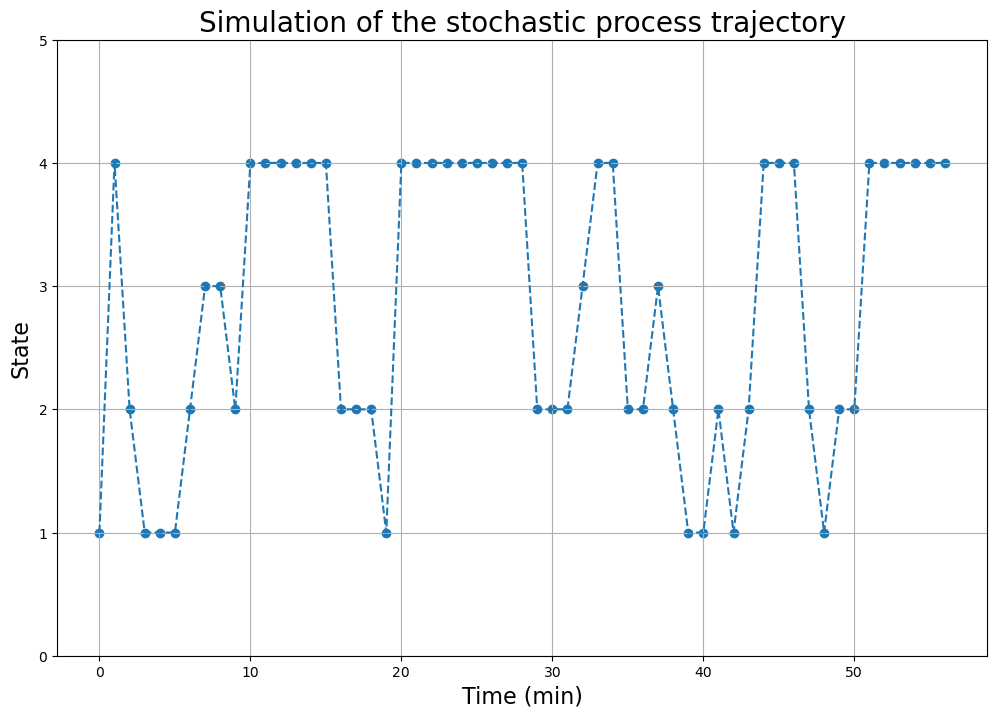

In [10]:
 # Definition of the stochastic process
def stochastic_process():
    initial_probs = [0.6, 0.3, 0.1, 0]
    probs_P = M[0]
    probs_E = M[1]
    probs_V = M[2]
    probs_N = M[3]

    time = np.arange(1, 57)

    # Create list of states and define the first state knowing the initial probabilities.
    states = []
    next_state = jump(initial_probs)
    states.append(next_state)

    # For the rest of the time instants, define the next state depending on the previous state.
    for i in range(len(time)):
        if states[i] == 1:
            next_state = jump(probs_P)
            states.append(next_state)
        if states[i] == 2:
            next_state = jump(probs_E)
            states.append(next_state)
        if states[i] == 3:
            next_state = jump(probs_V)
            states.append(next_state)
        if states[i] == 4:
            next_state = jump(probs_N)
            states.append(next_state)

    return states

# Define a time vector for plotting against a vector representing a realization of the stochastic process.
t = np.arange(57)
states = stochastic_process()

# Plot
plt.figure(figsize=(12,8))
plt.plot(t, states, '--')
plt.scatter(t, states)
plt.grid()
plt.title('Simulation of the stochastic process trajectory', fontsize=20)
plt.xlabel('Time (min)', fontsize=16)
plt.ylabel('State', fontsize=16)
_ = plt.yticks([0,1,2,3,4,5])


### e) We generate 10,000 realizations of the stochastic process described in part d). By calculating the relative frequency in these 10,000 realizations at 4:56pm, we estimate the probabilities that the student is in each of the activities P, E, V, and N at 4:56pm.

In [11]:
# List of realizations of the stochastic process
realizations = []
for i in range(10000):
    realizations.append(stochastic_process())

# Counters for the number of times the system fell into state i at time t=56.
count1 = 0
count2 = 0
count3 = 0
count4 = 0

# For each realization, check its state at time t=56 and increment the corresponding counter.
for real in realizations:
    if real[-1] == 1:
        count1 += 1
    elif real[-1] == 2:
        count2 += 1
    elif real[-1] == 3:
        count3 += 1
    elif real[-1] == 4:
        count4 += 1

# Vector of estimated probabilities with the 10000 realizations
estimated_probs = np.zeros((1,4))

estimated_probs[:,0] = count1 / 10000
estimated_probs[:,1] = count2 / 10000
estimated_probs[:,2] = count3 / 10000
estimated_probs[:,3] = count4 / 10000

# Compare the probabilities
print(f'The analytical probabilities of the student being in each of the activities P, E, V, and N are\n {a56}\n')
print(f'The estimated probabilities of the student being in each of the activities P, E, V, and N are\n {estimated_probs}\n')


The analytical probabilities of the student being in each of the activities P, E, V, and N are
 [0.28020566 0.2622108  0.07197943 0.38560411]

The estimated probabilities of the student being in each of the activities P, E, V, and N are
 [[0.2821 0.2618 0.0681 0.388 ]]



In [12]:
# Calculate estimated probabilities for all time. Each row of this matrix is a realization.
realizations_matrix = np.zeros((10000, len(realizations[0])))
for i in range(len(realizations)):
    realizations_matrix[i] = realizations[i]

# Size of the matrix.
n, m = np.shape(realizations_matrix)

# Number of 1s/2s/3s/4s at each time instant: the j-th component represents the number of 1s/2s/3s/4s at that time instant.
ones = np.zeros((len(realizations[0]),1))
twos = np.zeros((len(realizations[0]),1))
threes = np.zeros((len(realizations[0]),1))
fours = np.zeros((len(realizations[0]),1))

# Counters for state i at time instant j.
count1s = 0
count2s = 0
count3s = 0
count4s = 0

# Count the number of states at each time instant and add them to their corresponding vector.
for j in range(m):
    col_j = realizations_matrix[:,j]
    for num in col_j:
        if num == 1:
            count1s += 1
        elif num == 2:
            count2s += 1
        elif num == 3:
            count3s += 1
        elif num == 4:
            count4s += 1
    ones[j] = count1s
    twos[j] = count2s
    threes[j] = count3s
    fours[j] = count4s

    count1s = 0
    count2s = 0
    count3s = 0
    count4s = 0 

# Estimated probability vectors
probs1 = ones / 10000
probs2 = twos / 10000
probs3 = threes / 10000
probs4 = fours / 10000   


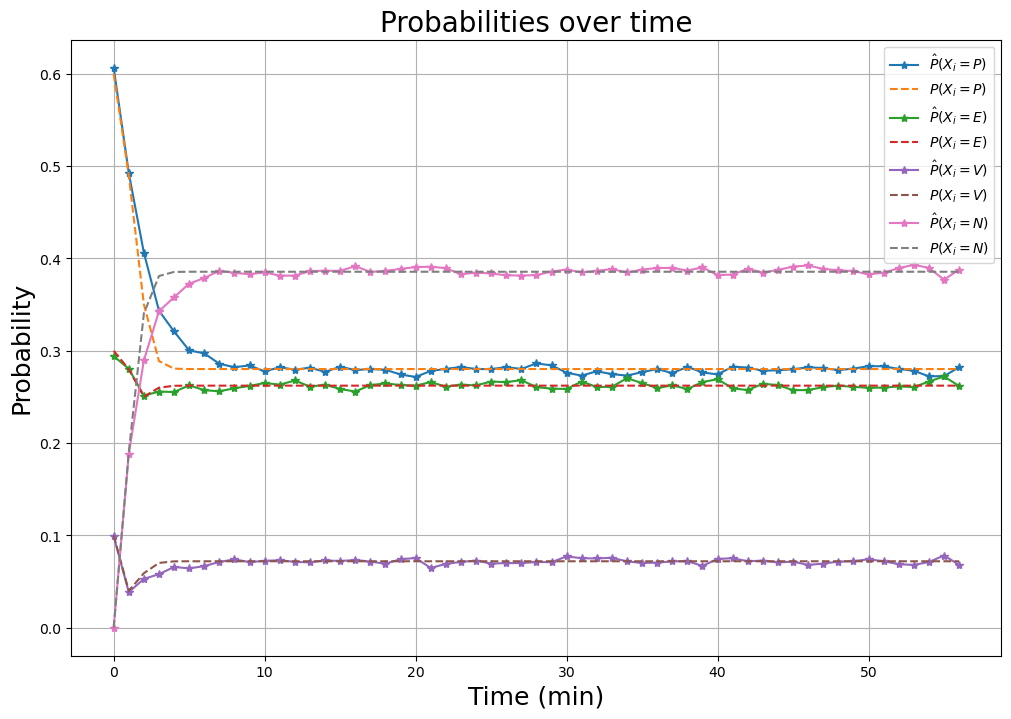

In [13]:
# Probability calculation using recurrence equation
a0 = np.array([0.6, 0.3, 0.1, 0])

# Create a matrix where each row represents the probabilities of being in state (P,E,V,N) at time instant i.
as_matrix = np.zeros((57,4))

# Fill the first row knowing the initial probabilities (a0).
as_matrix[0,:] = a0 @ np.linalg.matrix_power(M, 0) # Use recurrence equation.

# Fill each row of the matrix according to the recurrence equation.
for i in range(1,57):
    as_matrix[i,:] = as_matrix[i-1,:] @ np.linalg.matrix_power(M,i)

# Graphs to compare the estimation of each probability with the probability found using the recurrence equation.
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(t, probs1, '-*', label=r'$\hat{P}(X_i=P)$')
plt.plot(t, as_matrix[:,0], '--', label=r'$P(X_i=P)$')
plt.plot(t, probs2, '-*', label=r'$\hat{P}(X_i=E)$')
plt.plot(t, as_matrix[:,1], '--', label=r'$P(X_i=E)$')
plt.plot(t, probs3, '-*', label=r'$\hat{P}(X_i=V)$')
plt.plot(t, as_matrix[:,2], '--', label=r'$P(X_i=V)$')
plt.plot(t, probs4, '-*', label=r'$\hat{P}(X_i=N)$')
plt.plot(t, as_matrix[:,3], '--', label=r'$P(X_i=N)$')
plt.legend(loc="upper right")
plt.title('Probabilities over time', fontsize=20)
plt.xlabel('Time (min)', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.show()


Evidenciamos que en el minuto 56 las probabilidades resultan aproximadamente iguales a las calculadas en el inciso c). Se puede ver que las probabilidades convergen a un valor cercano a 

$$\alpha = [0.280, 0.262, 0.0712, 0.386]$$